# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
kmeans = KMeans(n_clusters=3)

In [5]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

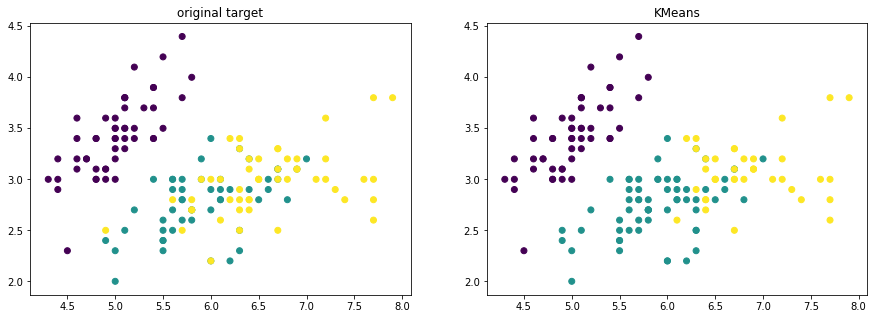

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,0], X[:,1], c=iris.target)

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

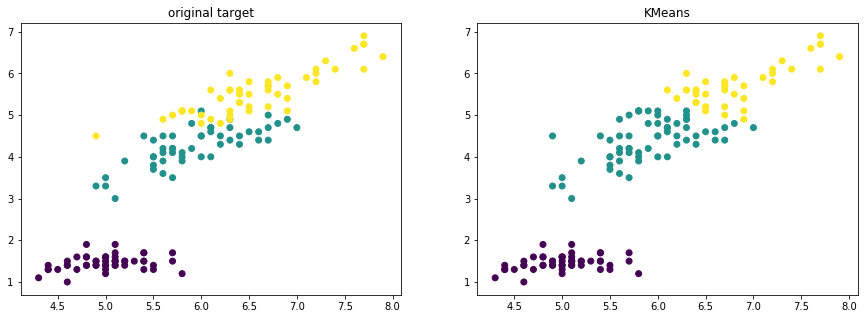

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,0], X[:,2], c=iris.target)

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:,0], X[:,2], c=kmeans.labels_)

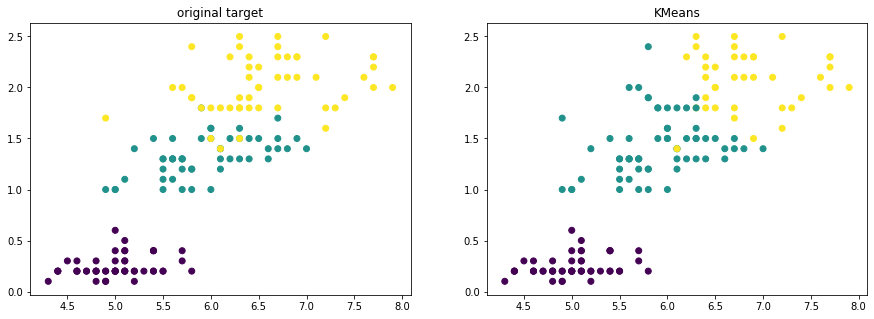

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,0], X[:,3], c=iris.target)

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:,0], X[:,3], c=kmeans.labels_)

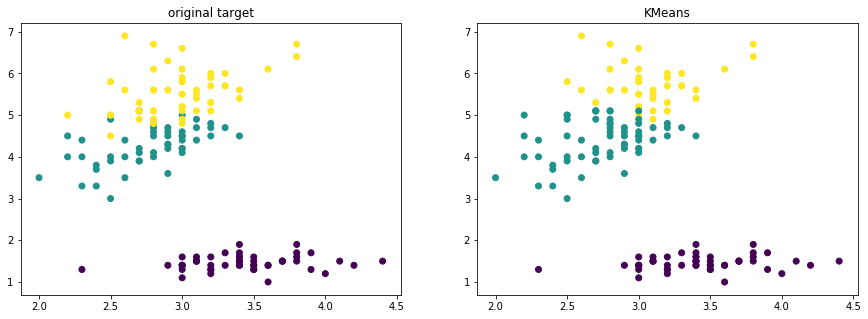

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,1], X[:,2], c=iris.target)

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:,1], X[:,2], c=kmeans.labels_)

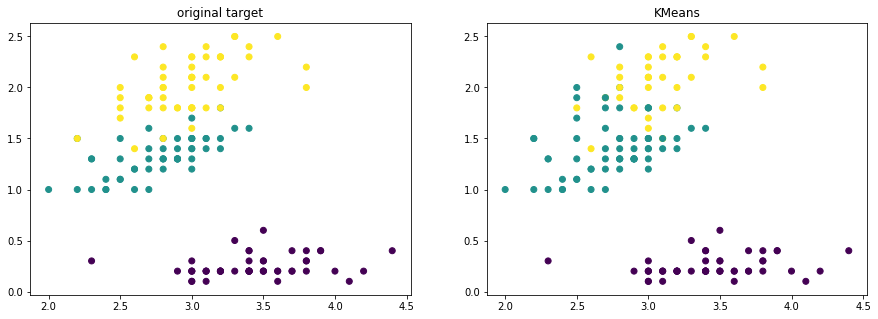

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,1], X[:,3], c=iris.target)

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:,1], X[:,3], c=kmeans.labels_)

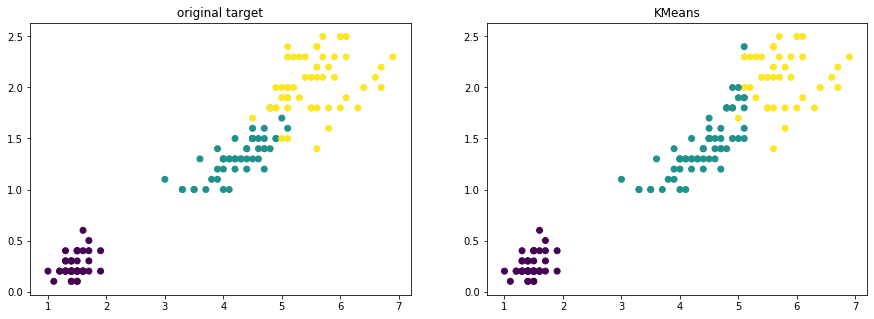

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('original target')
plt.scatter(X[:,2], X[:,3], c=iris.target)

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:,2], X[:,3], c=kmeans.labels_)

In [12]:
#六個也可以分？
kmeans2 = KMeans(n_clusters=6)

In [13]:
kmeans2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

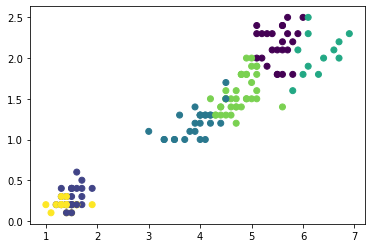

In [14]:
plt.scatter(X[:,2], X[:,3], c=kmeans2.labels_)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

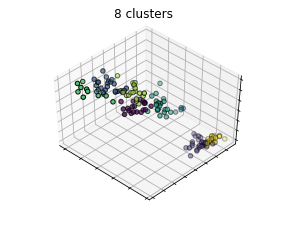

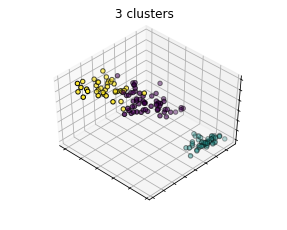

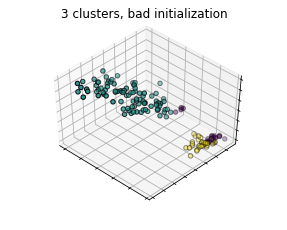

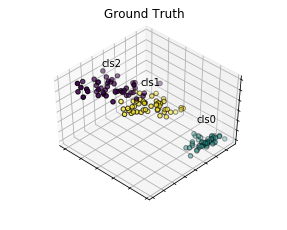

In [19]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()